In [66]:
# data processing
import numpy as np
import pandas as pd

# plotting 
import matplotlib.pyplot as plt
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
plt.rcParams['font.size'] = 14


---

In [67]:
# load data
df = pd.read_csv('./pdt_gmk_12022024.csv')
df.datetime = pd.to_datetime(df.datetime)
df.head()

,datetime,people,area,density
0,2024-02-12 08:00:01.659815,1,25,0.04
1,2024-02-12 08:01:01.026216,0,25,0.00
2,2024-02-12 08:02:00.327296,1,25,0.04
3,2024-02-12 08:02:59.602937,1,25,0.04
4,2024-02-12 08:03:59.022404,2,25,0.08


In [68]:
# set datetime as index
dfi = df.set_index('datetime')
dfi.head()

,people,area,density
datetime,,,
2024-02-12 08:00:01.659815,1,25,0.04
2024-02-12 08:01:01.026216,0,25,0.00
2024-02-12 08:02:00.327296,1,25,0.04
2024-02-12 08:02:59.602937,1,25,0.04
2024-02-12 08:03:59.022404,2,25,0.08


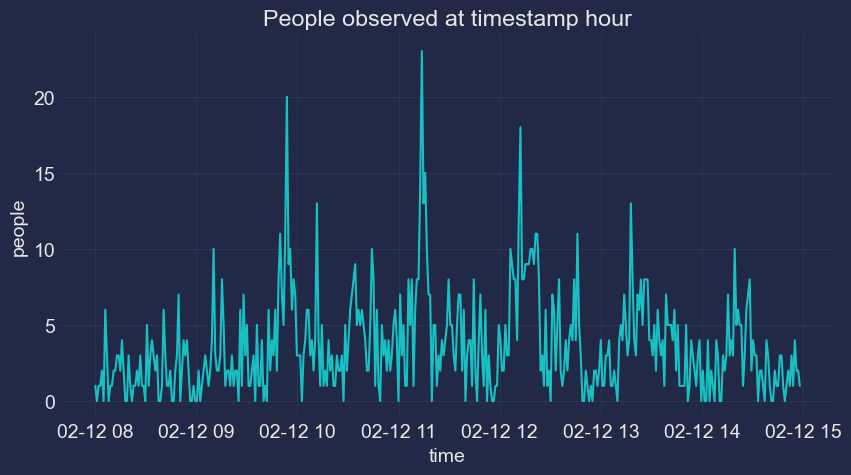

In [69]:
plt.figure(figsize=(10, 5))
plt.plot(dfi.people)
plt.title('People observed at timestamp hour')
plt.ylabel('people')
plt.xlabel('time')
plt.savefig('./imgs/fig_people.png')
plt.show()


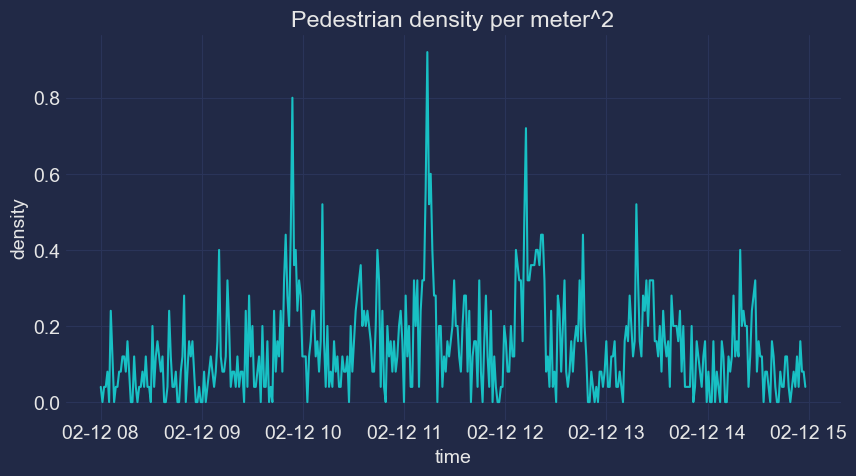

In [70]:
plt.figure(figsize=(10, 5))
plt.plot(dfi.density)
plt.title('Pedestrian density per meter^2')
plt.ylabel('density')
plt.xlabel('time')
plt.savefig('./imgs/fig_density.png')
plt.show()

In [71]:
""" Resample hourly
"""
dfi_h = dfi.resample('H').max()
dfi_h.head()

,people,area,density
datetime,,,
2024-02-12 08:00:00,7,25,0.28
2024-02-12 09:00:00,20,25,0.80
2024-02-12 10:00:00,13,25,0.52
2024-02-12 11:00:00,23,25,0.92
2024-02-12 12:00:00,18,25,0.72


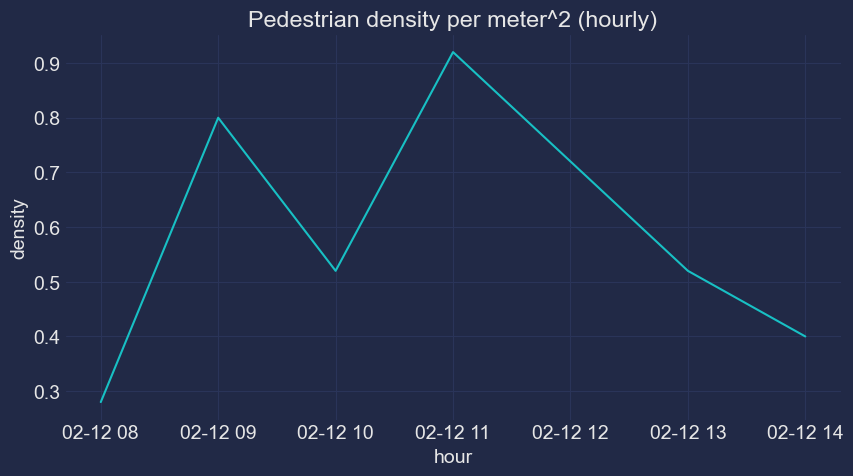

In [72]:
plt.figure(figsize=(10, 5))
plt.plot(dfi_h.density)
plt.title('Pedestrian density per meter^2 (hourly)')
plt.ylabel('density')
plt.xlabel('hour')
plt.savefig('./imgs/fig_density_hourly.png')
plt.show()